In [7]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


# Load the data from the CSV file

file_path = 'turnips2.csv'

data = pd.read_csv(file_path)



# Get the number of rows in the DataFrame

number_of_rows = len(data)

number_of_rows

9999

In [6]:
time_slot_columns = [col for col in data.columns if col not in ['Purchase'] and not col.endswith('_Profit')]

# Initialisation d'un nouveau DataFrame pour stocker les profits
profits_data = pd.DataFrame()

# Calcul des profits pour chaque demi-journée et ajout dans le nouveau DataFrame
for column in time_slot_columns:  # Utilisation des colonnes identifiées précédemment
    profits_data[f'{column}_Profit'] = data[column] - data['Purchase']

# Affichage des colonnes du DataFrame des profits pour vérifier
profits_data.columns.tolist()

['Mon-AM_Profit',
 'Mon-PM_Profit',
 'Tues-AM_Profit',
 'Tues-PM_Profit',
 'Wed-AM_Profit',
 'Wed-PM_Profit',
 'Thurs-AM_Profit',
 'Thurs-PM_Profit',
 'Fri-AM_Profit',
 'Fri-PM_Profit',
 'Sat-AM_Profit',
 'Sat-PM_Profit']

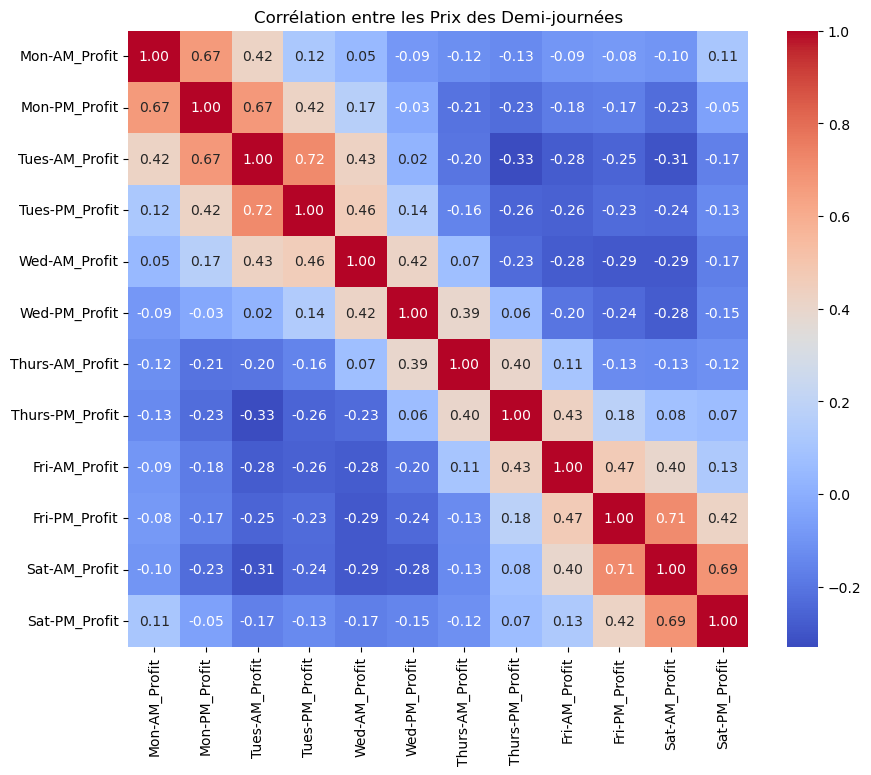

In [9]:
# Calcul de la corrélation entre les prix des demi-journées
correlation = profits_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Corrélation entre les Prix des Demi-journées')
plt.show()

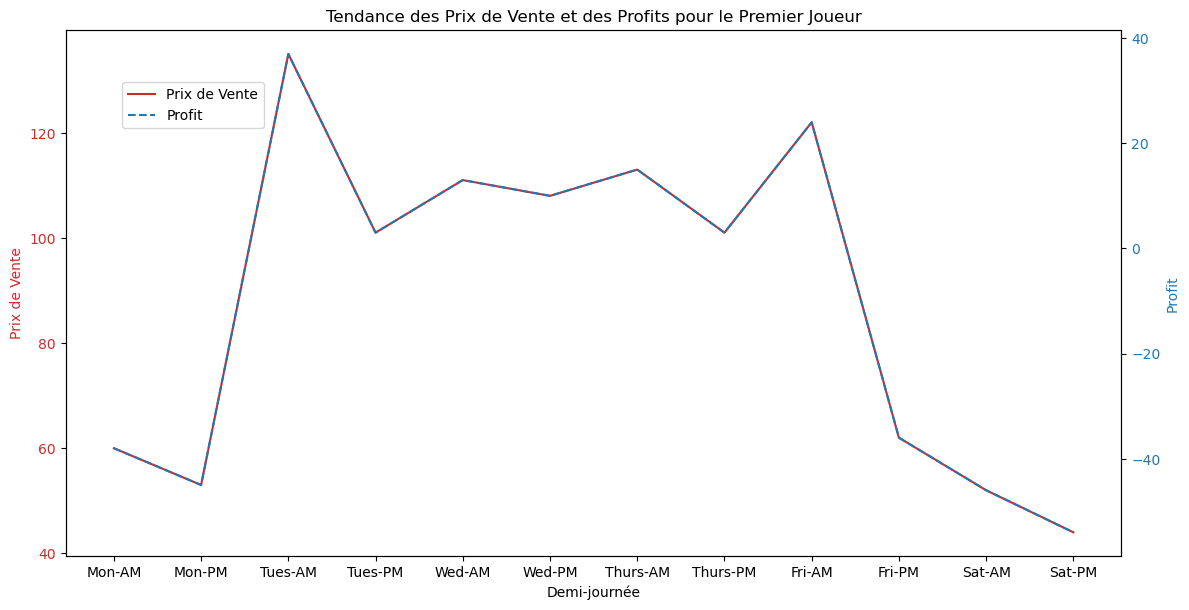

In [10]:
import matplotlib.pyplot as plt

# Supposons que vous souhaitez visualiser les données pour le premier joueur
player_data = data.iloc[0]

# Sélection des prix de vente pour le premier joueur pour chaque demi-journée
sale_prices = player_data[time_slot_columns]

# Sélection des profits pour le premier joueur pour chaque demi-journée
# Nous utilisons profits_data car il contient déjà les calculs de profit
profit_data = profits_data.iloc[0]

# Création d'une figure et d'un axe pour le tracé
fig, ax1 = plt.subplots(figsize=(12, 6))

# Tracé des prix de vente
color = 'tab:red'
ax1.set_xlabel('Demi-journée')
ax1.set_ylabel('Prix de Vente', color=color)
ax1.plot(time_slot_columns, sale_prices, color=color, label='Prix de Vente')
ax1.tick_params(axis='y', labelcolor=color)

# Création d'un deuxième axe pour les profits
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Profit', color=color)
ax2.plot(time_slot_columns, profit_data, color=color, linestyle='--', label='Profit')
ax2.tick_params(axis='y', labelcolor=color)

# Titre et légende
fig.tight_layout()
plt.title('Tendance des Prix de Vente et des Profits pour le Premier Joueur')
fig.legend(loc="upper left", bbox_to_anchor=(0.1,0.9))

plt.show()

In [32]:
from sklearn.cluster import KMeans
import numpy as np

# Préparation des données pour le clustering
# Ici, nous utilisons directement les prix des demi-journées comme caractéristiques
X_clustering = data[time_slot_columns].fillna(0)  # Remplacer les NaN par 0 si nécessaire

# Application de K-Means pour clusteriser les tendances des prix
kmeans = KMeans(n_clusters=5, random_state=42)  # Utiliser un nombre approprié de clusters
clusters = kmeans.fit_predict(X_clustering)

# Ajout des labels de cluster au DataFrame original
data['Cluster'] = clusters

c:\Users\thuym\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [33]:
# Analyse descriptive des clusters, par exemple, calculer la moyenne des prix par cluster
for i in range(kmeans.n_clusters):
    cluster_mean_prices = data[data['Cluster'] == i][time_slot_columns].mean(axis=0)
    print(f"Cluster {i} mean prices:\n{cluster_mean_prices}\n")

Cluster 0 mean prices:
Mon-AM       74.877015
Mon-PM       70.694611
Tues-AM      66.783049
Tues-PM      62.837402
Wed-AM       58.963151
Wed-PM       68.864579
Thurs-AM     91.920774
Thurs-PM    134.339936
Fri-AM      206.203593
Fri-PM      208.529249
Sat-AM      134.916168
Sat-PM       91.122985
dtype: float64

Cluster 1 mean prices:
Mon-AM       88.026744
Mon-PM      102.393023
Tues-AM     144.008140
Tues-PM     289.748837
Wed-AM      281.081395
Wed-PM      142.739535
Thurs-AM     88.322093
Thurs-PM     65.425581
Fri-AM       65.304651
Fri-PM       63.717442
Sat-AM       63.860465
Sat-PM       64.826744
dtype: float64

Cluster 2 mean prices:
Mon-AM       80.941448
Mon-PM       76.920647
Tues-AM      72.833590
Tues-PM      74.554700
Wed-AM      102.143297
Wed-PM      139.471495
Thurs-AM    252.688752
Thurs-PM    250.358243
Fri-AM      141.872111
Fri-PM       83.439908
Sat-AM       64.811248
Sat-PM       63.607858
dtype: float64

Cluster 3 mean prices:
Mon-AM       88.104738
Mon-PM   

In [36]:
# Utilisation de K-Means pour le clustering
kmeans = KMeans(n_clusters=5, random_state=42)
data['Cluster'] = kmeans.fit_predict(data[time_slot_columns].fillna(0))

c:\Users\thuym\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
